<h3 align="center">Codebasics ML Course: Feature Selection Using VIF</h3>

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("salaries.csv")
df.head()

,Years of Experience,Education Level,Age,Location Factor,Salary
0,29,1,49,7,124204
1,27,3,45,4,125948
2,20,4,41,8,116078
3,14,4,37,5,106486
4,20,3,42,7,113297


In [35]:
df.shape

(1000, 5)

### Train a Model With All Features

In [51]:
X = df.drop('Salary', axis='columns')
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model_full=LinearRegression()
model_full.fit(X_train, y_train)
model_full.score(X_test, y_test)

0.9525773624816919

In [52]:
X.columns

Index(['Years of Experience', 'Education Level', 'Age', 'Location Factor'], dtype='object')

In [57]:
model_full.intercept_

52608.487605282404

In [56]:
model_full.coef_

array([2113.98280589, 5007.82035443, -123.21488799, 1487.64526717])

In [71]:
X_test[:1]

,Years of Experience,Education Level,Age,Location Factor
841,38,1,56,9


In [72]:
y_test[:1]

841    151272
Name: Salary, dtype: int64

In [68]:
model_full.intercept_ + model_full.coef_[0]*38 + model_full.coef_[1]*1 + model_full.coef_[2]*56 + model_full.coef_[3]*9

144436.42826039356

In [70]:
model_full.predict(X_test[:1])

array([144436.42826039])

<Axes: xlabel='Age', ylabel='Salary'>

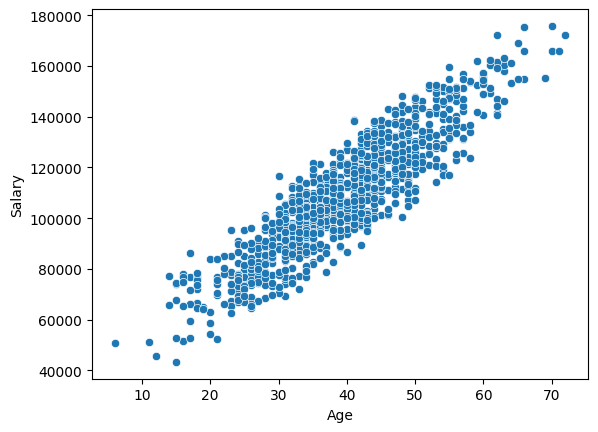

In [54]:
sns.scatterplot(df, x="Age", y="Salary")

### Let's Understand Multicolinearity Using VIF

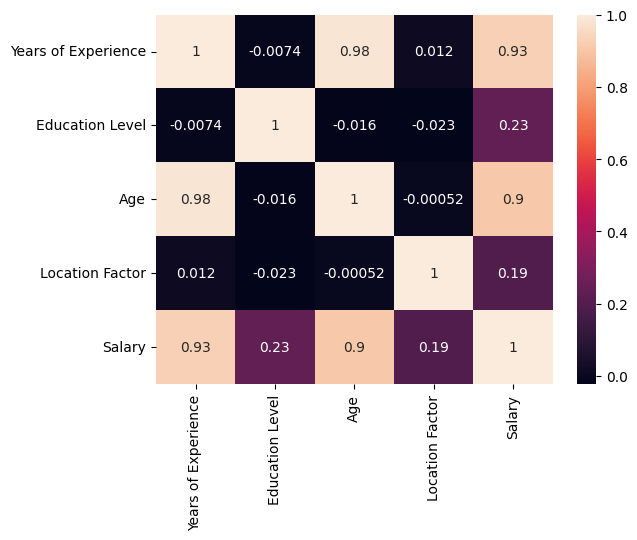

In [73]:
cm = df.corr()

sns.heatmap(cm,annot=True)
plt.show()

### Compute Variance Inflation Factor (VIF)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Variable'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [75]:
X = df.drop('Salary', axis="columns")

calculate_vif(X)

,Variable,VIF
0,Years of Experience,22.342087
1,Education Level,5.472969
2,Age,42.201149
3,Location Factor,4.289467


We will start dropping columns that has VIF > 10, one column at a time

In [76]:
calculate_vif(X.drop(['Age'],axis="columns"))

,Variable,VIF
0,Years of Experience,3.198601
1,Education Level,3.509425
2,Location Factor,3.231181


### Train a Model With Features that are Filtered Using VIF

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("Age", axis="columns"), y, test_size=0.2, random_state=10)

model_reduced=LinearRegression()
model_reduced.fit(X_train, y_train)
model_reduced.score(X_test, y_test)

0.9523792255284542

In [78]:
model_reduced.coef_

array([1995.01818661, 5019.90803026, 1495.54971534])